In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from streetViewDownloader import downloadImage
from tqdm.notebook import tqdm
import time

In [2]:
streetPoints = gpd.read_file("./data/streetViewPoints.geojson")
streetPoints = streetPoints.to_crs(4326)
streetPoints["lon"] = streetPoints.geometry.x
streetPoints["lat"] = streetPoints.geometry.y

In [3]:
streetPoints.head()

,fid,SEG_ID,pointId,geometry,lon,lat
0,1,420708,000001,POINT (-75.16460 39.95994),-75.164601,39.959935
1,2,422065,000002,POINT (-75.16357 39.96050),-75.163569,39.960505
2,3,420702,000003,POINT (-75.16619 39.96013),-75.166186,39.960131
3,5,420696,000004,POINT (-75.16776 39.96033),-75.167756,39.960328
4,8,422066,000005,POINT (-75.16672 39.96089),-75.166721,39.960895


<AxesSubplot:>

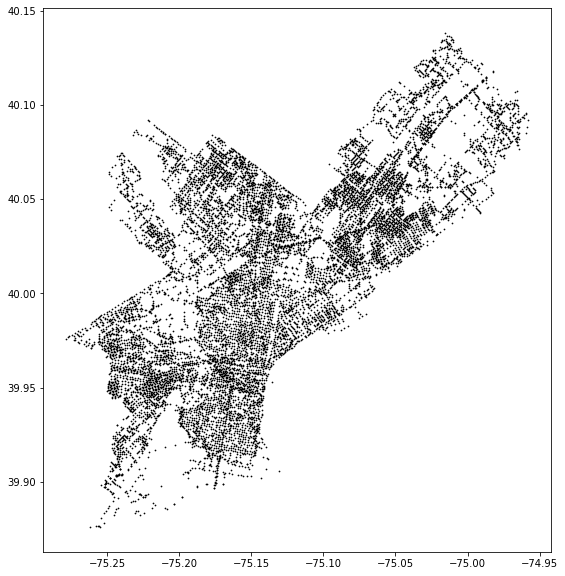

In [4]:
f,ax = plt.subplots(figsize=(20,10))
streetPoints.plot(ax=ax,markersize=.5,color="black")

In [5]:
# define a startRow to continue when facing Error
startRow=0

# saving Images to this path
imgDirPath = "./downloadedImages/"

# set time interval
timeInterval = .3

In [14]:
# main downloading process
for i, row in tqdm(streetPoints[startRow:].iterrows(),
                   total=streetPoints.shape[0]-startRow):
    SEG_ID = row.SEG_ID
    pointId = row.pointId
    lon = row.lon
    lat = row.lat
    
    # download Image
    try:
        img = downloadImage(lon,lat)
    except Exception as e:
        print("Exception:",e,f", RowNumber: {i}\nSEG_ID:{SEG_ID}, pointId:{pointId}, lon:{lon}, lat:{lat}")
        startRow=i
        raise e
    
    # saving file
    _imgName = f"{SEG_ID}-{pointId}.jpg"
    _imgPath = imgDirPath + _imgName
    print("Saving to",_imgPath, "...",end="\r")
    img.save(_imgPath)
    
    # setting interval
    time.sleep(timeInterval)
    startRow = i+1

  0%|          | 0/10585 [00:00<?, ?it/s]